Source: https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/#introduction

In [42]:
# ============================== loading libraries ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter


In [43]:
# ============================== data preprocessing ===========================================
# define column names
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# loading training data
df = pd.read_csv('../Datafiles/iris_data.txt', header=None, names=names)
print(df.head())

# create design matrix X and target vector y

#X = np.array(df.ix[:, 0:4]) 	# end index is exclusive
#X = np.array(df.ix[:, 0:4]) 	# end index is exclusive

X = np.array(df.loc[:, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y = np.array(df['class']) 	# showing you two ways of indexing a pandas df

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [44]:
# ============================== KNN with k = 3 ===============================================
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = 3 is %d%%' % acc)


The accuracy of the knn classifier for k = 3 is 98%



The optimal number of neighbors is 7.


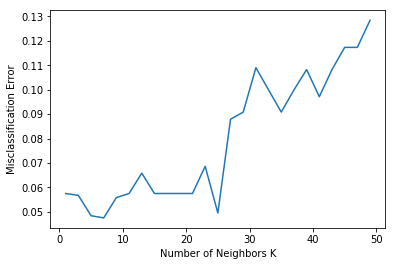

In [45]:
# ============================== parameter tuning =============================================
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [46]:
def train(X_train, y_train):
    # do nothing 
    return

In [47]:
def predict(X_train, y_train, x_test, k):
    # create list for distances and targets
    distances = []
    targets = []

    for i in range(len(X_train)):
        # first we compute the euclidean distance
        distance = np.sqrt(np.sum(np.square(x_test - X_train[i, :])))
        # add it to list of distances
        distances.append([distance, i])

    # sort the list
    distances = sorted(distances)

    # make a list of the k neighbors' targets
    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

In [50]:
def my_knn(X_train, y_train, X_test, predictions, k):
    # check if k is not larger than n
    if k > len(X_train):
        raise ValueError

    # train on the input data
    train(X_train, y_train)

    # predict for each testing observation
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

In [51]:
predictions = []
try:
    my_knn(X_train, y_train, X_test, predictions, 7)
    predictions = np.asarray(predictions)

    # evaluating accuracy
    accuracy = accuracy_score(y_test, predictions) * 100
    print('\nThe accuracy of OUR classifier is %d%%' % accuracy)

except ValueError:
    print('Can\'t have more neighbors than training samples!!')


The accuracy of OUR classifier is 98%
